In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import random

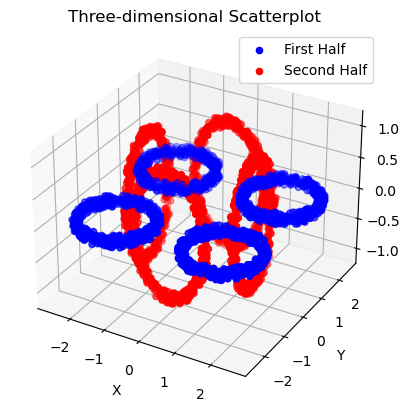

In [2]:
# Load the dataset
data = np.loadtxt('visualization-dataset.txt', delimiter=',')

# Split the dataset into two halves
half = len(data) // 2
first_half = data[:half]
second_half = data[half:]

# Create a three-dimensional scatterplot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the first half of the dataset
ax.scatter(first_half[:, 0], first_half[:, 1], first_half[:, 2], c='blue', label='First Half')

# Plot the second half of the dataset
ax.scatter(second_half[:, 0], second_half[:, 1], second_half[:, 2], c='red', label='Second Half')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Three-dimensional Scatterplot')

# Add a legend
ax.legend()

# Show the plot
plt.show()

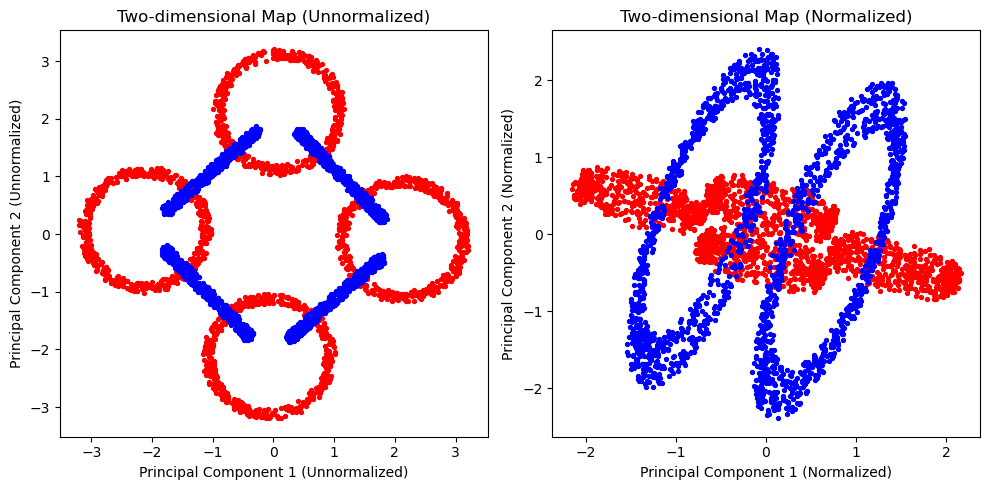

In [3]:
# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(data)

# Apply PCA to the unnormalized features
pca = PCA(n_components=2)
X_pca_unnormalized = pca.fit_transform(data)

# Apply PCA to the normalized features
X_pca_normalized = pca.fit_transform(X_normalized)

# Plot the unnormalized data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_pca_unnormalized[:half, 0], X_pca_unnormalized[:half, 1], c='r', s=8)
plt.scatter(X_pca_unnormalized[half:, 0], X_pca_unnormalized[half:, 1], c='b', s=8)
plt.xlabel('Principal Component 1 (Unnormalized)')
plt.ylabel('Principal Component 2 (Unnormalized)')
plt.title('Two-dimensional Map (Unnormalized)')

# Plot the normalized data
plt.subplot(1, 2, 2)
plt.scatter(X_pca_normalized[:half, 0], X_pca_normalized[:half, 1], c='r', s=8)
plt.scatter(X_pca_normalized[half:, 0], X_pca_normalized[half:, 1], c='b', s=8)
plt.xlabel('Principal Component 1 (Normalized)')
plt.ylabel('Principal Component 2 (Normalized)')
plt.title('Two-dimensional Map (Normalized)')

# Show the plots
plt.tight_layout()
plt.show()

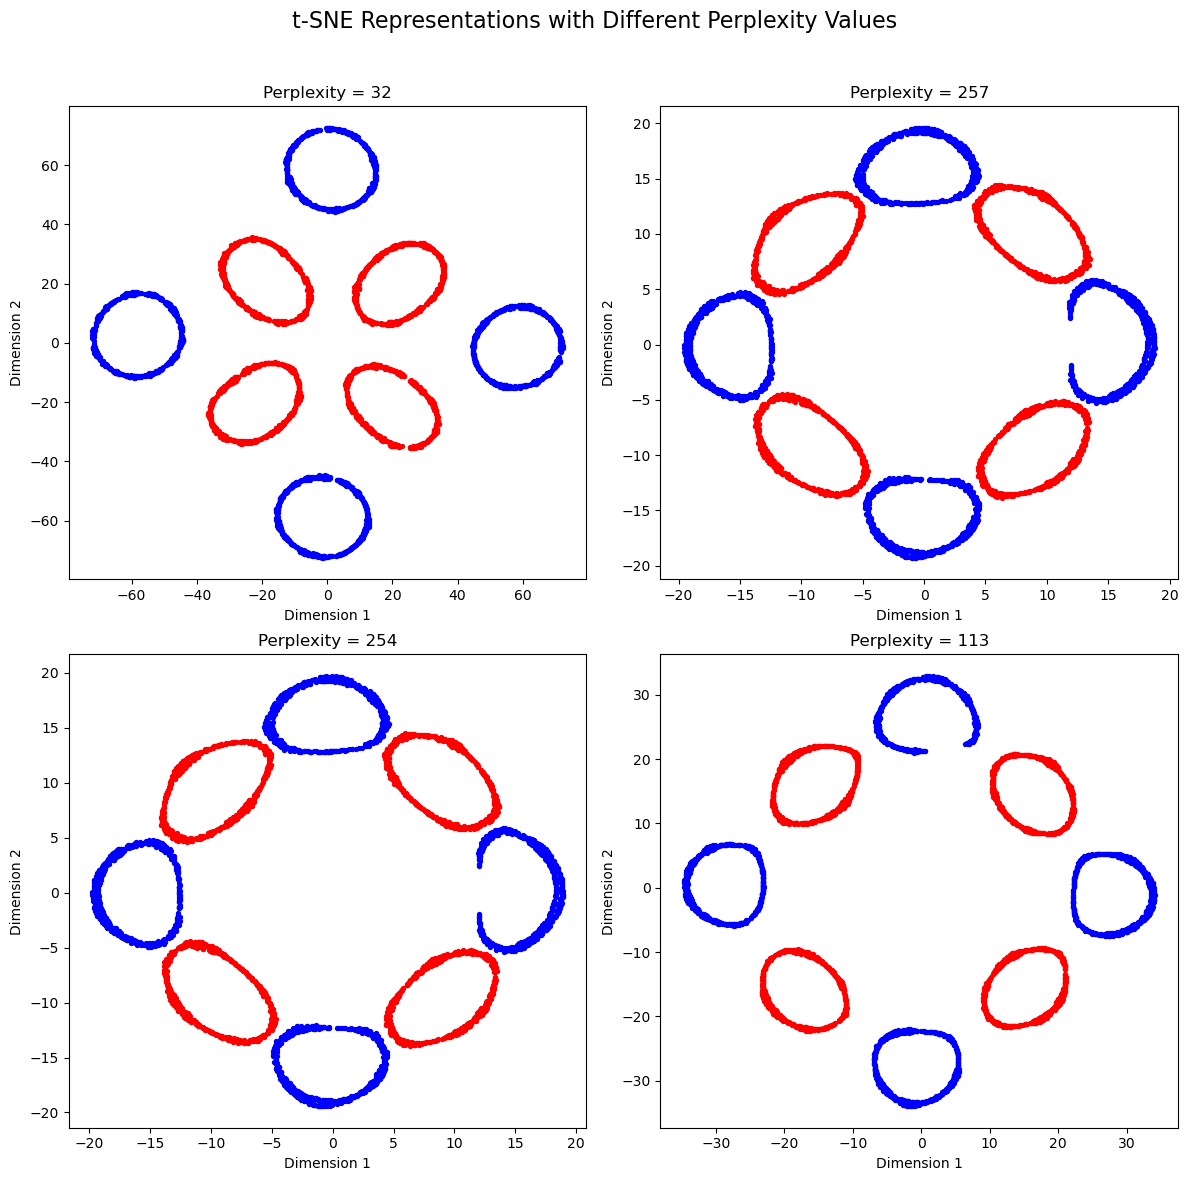

In [4]:
# Define the perplexity values
perplexities = random.sample(range(30, 301), 4)

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle("t-SNE Representations with Different Perplexity Values", fontsize=16)

# Iterate through perplexity values and create subplots
for i, perplexity in enumerate(perplexities):
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=0, n_jobs=-1)
    X_tsne = tsne.fit_transform(data)
    
    # Determine the subplot position
    row = i // 2
    col = i % 2
    
    # Scatter plot in the current subplot
    axes[row, col].scatter(X_tsne[:half, 0], X_tsne[:half, 1], c='b', s=8)
    axes[row, col].scatter(X_tsne[half:, 0], X_tsne[half:, 1], c='r', s=8)
    axes[row, col].set_title(f"Perplexity = {perplexity}")
    axes[row, col].set_xlabel('Dimension 1')
    axes[row, col].set_ylabel('Dimension 2')

# Adjust the layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()